In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

Matplotlib created a temporary cache directory at /tmp/matplotlib-7ciw4k61 because the default path (/home/grad/si/22/aliciachaves/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Valor Normal

In [2]:
df_copia_normal = pd.read_csv('df_og.csv')

age_n = df_copia_normal['age'].mean(axis=0)
df_copia_normal['gender'] = df_copia_normal['gender'].fillna(0)
df_copia_normal['age'] = df_copia_normal['age'].fillna(age_n)
df_copia_normal['diagnostico'] = df_copia_normal['diagnostico'].fillna(0)

In [3]:
#Inflammation
df_copia_normal['bands'] = df_copia_normal['bands'].fillna(250)
df_copia_normal['CRP'] = df_copia_normal['CRP'].fillna(5)

df_copia_normal['ESR'] = df_copia_normal['ESR'].fillna(10)
df_copia_normal['temp'] = df_copia_normal['temp'].fillna(36.85)
df_copia_normal['lactate'] = df_copia_normal['lactate'].fillna(1)
df_copia_normal['WBC'] = df_copia_normal['WBC'].fillna(7500)
df_copia_normal['lymphs'] = df_copia_normal['lymphs'].fillna(2000)

#Pulmonary
df_copia_normal['resp'] = df_copia_normal['resp'].fillna(16)
df_copia_normal['spo2/fio2'] = df_copia_normal['spo2/fio2'].fillna(450)
df_copia_normal['pao2/fio2'] = df_copia_normal['pao2/fio2'].fillna(600)

#Cardiovascular
df_copia_normal['bicarbonate'] = df_copia_normal['bicarbonate'].fillna(23)
df_copia_normal['heartRate'] = df_copia_normal['heartRate'].fillna(75)
df_copia_normal['troponin'] = df_copia_normal['troponin'].fillna(115)
df_copia_normal['systolic'] = df_copia_normal['systolic'].fillna(0.01)
df_copia_normal['diastolic'] = df_copia_normal['diastolic'].fillna(62.5)
df_copia_normal['MAP'] = df_copia_normal['MAP'].fillna(85)

#Renal
df_copia_normal['bloodUreaNitrogen'] = df_copia_normal['bloodUreaNitrogen'].fillna(10)

#Hepatic
df_copia_normal['alanine'] = df_copia_normal['alanine'].fillna(24)
df_copia_normal['aspartate'] = df_copia_normal['aspartate'].fillna(22.5)
df_copia_normal['bilirubin'] = df_copia_normal['bilirubin'].fillna(0.6)

#Hematologic
df_copia_normal['hemoglobin'] = df_copia_normal['hemoglobin'].fillna(18)
df_copia_normal['iqr'] = df_copia_normal['iqr'].fillna(0.6)
df_copia_normal['platelets'] = df_copia_normal['platelets'].fillna(275)
df_copia_normal['PTT'] = df_copia_normal['PTT'].fillna(0.8)
df_copia_normal['fibrinogen'] = df_copia_normal['fibrinogen'].fillna(300)

#Bioquimica
df_copia_normal['albumin'] = df_copia_normal['albumin'].fillna(4.35)
df_copia_normal['chloride'] = df_copia_normal['chloride'].fillna(102.5)
df_copia_normal['glucose'] = df_copia_normal['glucose'].fillna(125)
df_copia_normal['sodium'] = df_copia_normal['sodium'].fillna(140)
df_copia_normal['gcs total'] = df_copia_normal['gcs total'].fillna(15)
df_copia_normal['potassium'] = df_copia_normal['potassium'].fillna(4.5)
df_copia_normal['calcium'] = df_copia_normal['calcium'].fillna(9.6)
df_copia_normal['phosphate'] = df_copia_normal['phosphate'].fillna(3.5)
df_copia_normal['magnesium'] = df_copia_normal['magnesium'].fillna(2.1)


#Diagnostico
df_copia_normal['diagnostico'] = df_copia_normal['diagnostico'].fillna(0)

In [4]:
df_copia_normal[df_copia_normal['diagnostico'] == 1]['diagnostico'].value_counts()

diagnostico
1.0    17088
Name: count, dtype: int64

In [5]:
df_copia_normal.to_csv("df_normal.csv", index=False)

Matriz de Correlação

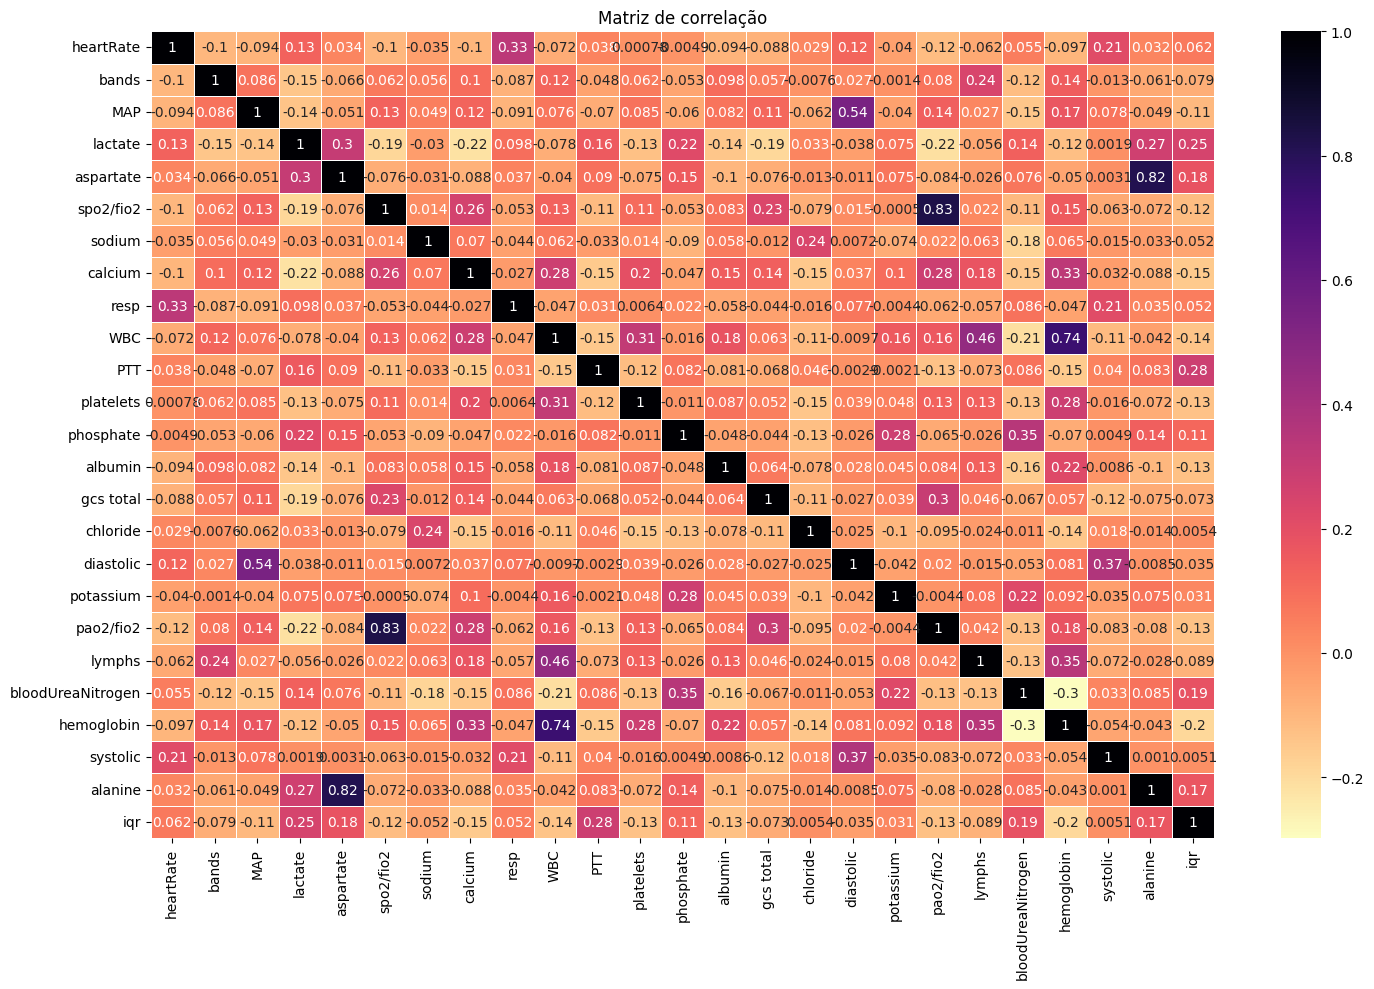

In [6]:
# Calculate the correlation matrix only for numeric columns
matriz_correlacao = df_copia_normal.select_dtypes(include=['float64', 'int64']).corr()
# Definir um limite para correlações significativas
limite_correlacao = 0.2

# Identificar as variáveis que têm correlações positivas maiores que o limite
variaveis_correlatadas = set()
for col in matriz_correlacao.columns:
    correlacoes = matriz_correlacao[col]
    variaveis_significativas = correlacoes[correlacoes >= limite_correlacao].index
    if len(variaveis_significativas) > 1:  # Excluir auto-correlações
        variaveis_correlatadas.update(variaveis_significativas)

# Converter o set para lista
variaveis_correlatadas = list(variaveis_correlatadas)


# Filtrar a matriz de correlação para incluir apenas as variáveis mais correlacionadas
matriz_correlacao_filtrada = matriz_correlacao.loc[variaveis_correlatadas, variaveis_correlatadas]

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_correlacao_filtrada, annot=True, cmap='magma_r', linewidths=0.5)
plt.title('Matriz de correlação')
# Ajustar o layout para melhor visualização
plt.tight_layout()
plt.show()

Knn

In [7]:
from sklearn.impute import KNNImputer

df_copia_knn = pd.read_csv('df_og.csv')
num_cols_before = df_copia_knn.shape[1]
print (num_cols_before)

39


In [8]:
cols_all_nan = df_copia_knn.columns[df_copia_knn.isnull().all()]
print (cols_all_nan)

Index([], dtype='object')


In [9]:
df_copia_knn['systolic'] = df_copia_knn['systolic'].fillna(0.01)
df_copia_knn['diastolic'] = df_copia_knn['diastolic'].fillna(62.5)

In [10]:
# Nome da coluna que não será imputada
diagnostico = 'diagnostico'

# Separar a coluna que não será imputada
diagnostico_data = df_copia_knn[[diagnostico]]

# Remover a coluna que não será imputada do DataFrame
df_para_imputar = df_copia_knn.drop(columns=[diagnostico])

# Convertendo todas as colunas para tipo float
df_para_imputar = df_para_imputar.astype(float)

# Substituindo valores infinitos por NaN
df_para_imputar.replace([np.inf, -np.inf], np.nan, inplace=True)

# Criando um objeto KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Imputando os dados
data_imputed_knn = knn_imputer.fit_transform(df_para_imputar)

# Verifica o número de colunas após a imputação
num_cols_after = data_imputed_knn.shape[1]
print(num_cols_after)

# Transformando os dados imputados de volta em um DataFrame
df_imputado = pd.DataFrame(data_imputed_knn, columns=df_para_imputar.columns)

# Adicionando de volta a coluna que não foi imputada
df_knn = pd.concat([df_imputado, diagnostico_data], axis=1)

# Verificando o resultado final
df_knn['diagnostico'] = df_knn['diagnostico'].fillna(0)
df_knn

38


,patientunitstayid,gender,age,ethnicity,bands,CRP,ESR,temp,lactate,WBC,...,albumin,chloride,glucose,sodium,gcs total,potassium,calcium,phosphate,magnesium,diagnostico
0,141168.0,1.0,70.0,1.0,11.0,7.648,47.2,36.266667,1.32,9.80,...,3.10,101.0,95.0,139.0,15.0,4.00,8.800,4.78,1.98,0.0
1,141178.0,1.0,52.0,1.0,15.0,9.908,47.2,36.811111,7.06,14.06,...,2.50,103.4,124.6,140.8,12.6,3.80,7.712,4.52,1.70,0.0
2,141179.0,1.0,52.0,1.0,17.4,9.908,47.2,36.766667,1.74,13.88,...,2.62,109.0,54.0,146.0,12.6,3.60,7.800,4.60,1.80,0.0
3,141194.0,0.0,68.0,1.0,17.4,9.908,47.2,36.222222,1.30,14.10,...,2.30,108.0,168.0,134.0,13.0,3.40,7.400,3.30,1.20,0.0
4,141196.0,0.0,71.0,1.0,17.4,9.908,35.4,36.577778,2.20,26.20,...,2.50,97.0,144.0,135.0,12.6,4.10,9.000,3.44,1.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200854,3353235.0,0.0,50.0,1.0,20.8,3.748,25.4,37.000000,1.90,11.32,...,3.32,107.2,155.8,140.6,15.0,4.36,7.820,4.50,1.48,0.0
200855,3353237.0,1.0,79.0,1.0,10.4,3.748,25.4,37.000000,1.90,9.50,...,3.50,101.0,139.0,140.0,14.0,3.60,9.000,3.16,2.06,0.0
200856,3353251.0,0.0,73.0,4.0,9.2,3.748,25.4,37.000000,2.52,20.40,...,2.42,105.0,346.0,142.0,3.0,3.10,4.100,6.90,1.40,1.0
200857,3353254.0,0.0,81.0,1.0,9.4,3.748,25.4,37.000000,1.24,15.30,...,3.08,117.0,156.0,141.0,15.0,5.70,6.400,3.70,1.70,0.0


In [11]:
df_knn.to_csv("df_knn.csv", index=False)

Matriz de Correlação

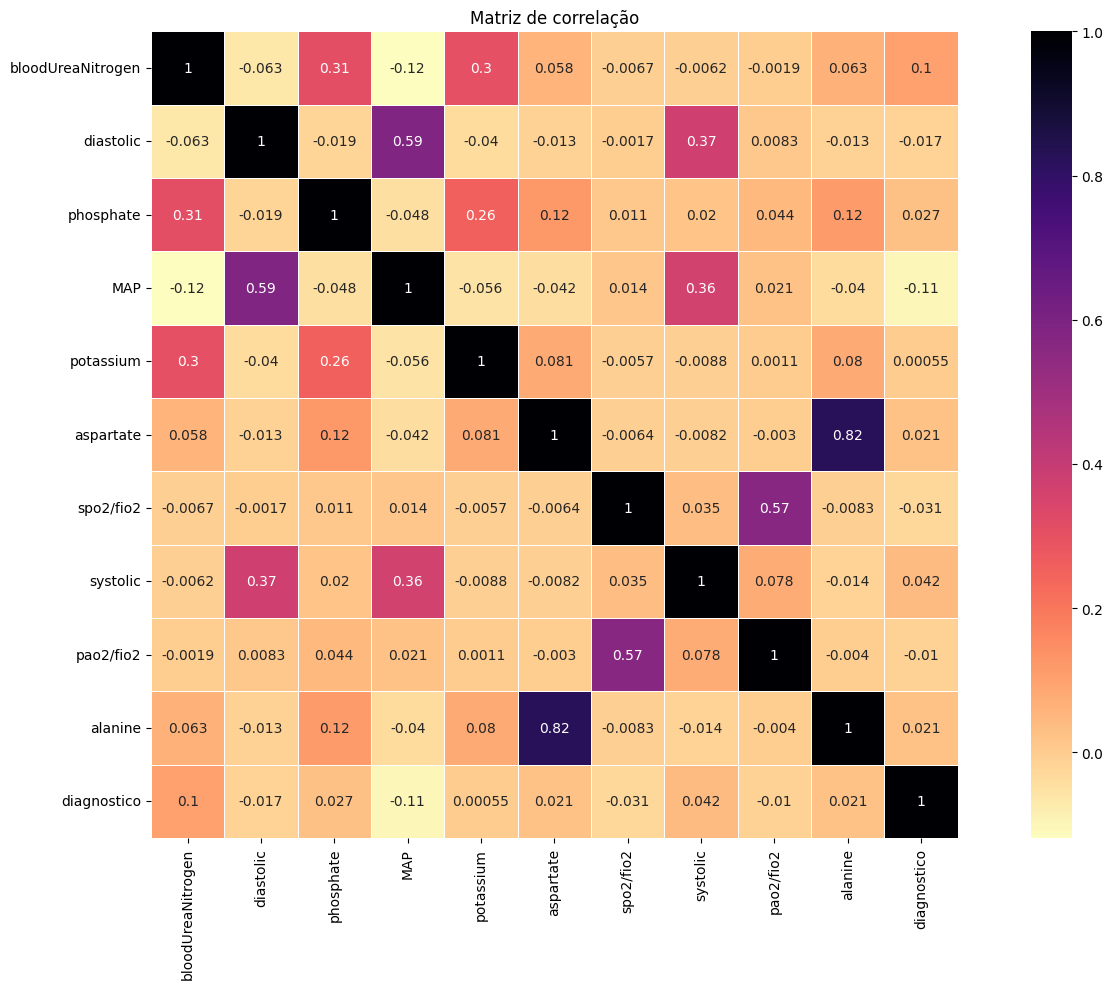

In [12]:
# Calculate the correlation matrix only for numeric columns
matriz_correlacao = df_knn.select_dtypes(include=['float64', 'int64']).corr()
# Definir um limite para correlações significativas
limite_correlacao = 0.3

# Identificar as variáveis que têm correlações positivas maiores que o limite
variaveis_correlatadas = set()
for col in matriz_correlacao.columns:
    correlacoes = matriz_correlacao[col]
    variaveis_significativas = correlacoes[correlacoes >= limite_correlacao].index
    if len(variaveis_significativas) > 1:  # Excluir auto-correlações
        variaveis_correlatadas.update(variaveis_significativas)

# Converter o set para lista
variaveis_correlatadas = list(variaveis_correlatadas)

# Garantir que a coluna 'diagnostico' esteja incluída
if 'diagnostico' in df_knn.columns:
    variaveis_correlatadas.append('diagnostico')

# Filtrar a matriz de correlação para incluir apenas as variáveis mais correlacionadas
matriz_correlacao_filtrada = matriz_correlacao.loc[variaveis_correlatadas, variaveis_correlatadas]

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_correlacao_filtrada, annot=True, cmap='magma_r', linewidths=0.5, square=True)
plt.title('Matriz de correlação')
# Ajustar o layout para melhor visualização
plt.tight_layout()
plt.show()